# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#Paso 2 Trasnforma el HTML
#URL de la página que queremos scrapear
url = "https://companies-market-cap-copy.vercel.app/index.html"

# Petición para descargar el fichero de Internet
response = requests.get(url, time.sleep(10))

#Comprobar si la solicitud fue exitosa
if response.status_code == 200:
    #La solicitud fue exitosa
    html_content = response.text
    print("HTML descargado correctamente")
    print(html_content)
else:
    print(f"Error {response.status_code}: No se puede realizar la descarga")

HTML descargado correctamente

<!DOCTYPE html>
<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">
<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">
<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">
<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">
<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">
<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">
<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">


In [7]:
#Paso 3
#Encontrar la tabla con la evolucion anual
#Buscar todas las tablas
# Si la petición se ha ejecutado correctamente (código 200), entonces el contenido HTML de la página se ha podido descargar
if response:
    # Crear un objeto BeautifulSoup con el contenido HTML
    soup = BeautifulSoup(response.text, "html.parser")

#Obtener todos los elementos de tipo "table" del html
tables = soup.find_all("table")
#Mostrar el número de tablas encontradas 
print (f"El número de tablas encontradas es {len(tables)}")

# Encontrar la tabla con la evolución anual
# Encontrar todas las etiquetas <h3> en el contenido HTML 
headings = soup.find_all("h3")
print(f"El numero de etiquetas <h3> encontradas es {len(headings)}")
revenue_table = None 
for heading in headings: 
    if "Annual revenue" in heading.text: 
        print(f"Se encontro el encabezado: {heading.text}")
        #Buscar la siguiente tabla despues de la etiqueta <h3>
        sibling = heading.find_next_sibling()
        iteration_count = 0
        max_iteration = 50
        # Continuar buscando hasta encontrar una tabla
        while sibling and sibling.name != "table" and iteration_count<max_iteration:
            if sibling.name == "div":
                #Buscar la tabla dentro del <div>
                possible_table = sibling.find("table")
                if possible_table:
                    revenue_table = possible_table
                    print ("Tabla encontrada:", revenue_table)
                    break


El número de tablas encontradas es 2
El numero de etiquetas <h3> encontradas es 2
Se encontro el encabezado: Annual revenue
Tabla encontrada: <table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr>

In [10]:
# Extraer las filas 
import pandas as pd
rows = revenue_table.find_all("tr")

# Procesar datos de la tabla
data = []
for row in rows[1:]:  # Saltar la fila de encabezado
    cols = row.find_all("td")
    fecha = cols[0].text.strip()
    ingresos = cols[1].text.strip()
    data.append([fecha, ingresos])

data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [13]:
#Paso 3 Almacenar los datos en un Dataframe
import pandas as pd
if revenue_table:
    # Extraer los datos de la tabla y almacenarlos en un DataFrame
    rows = revenue_table.find_all("tr")
    data = []
    for row in rows[1:]:
        cols = row.find_all("td")
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date,revenue])
    

#Crear el data frame a partir de la lista 
dataframe = pd.DataFrame(data, columns = ["Year", "Revenue"])
#Mostrar el DataFraem
print(dataframe)

    Year   Revenue
0   2024  $97.15 B
1   2023  $96.77 B
2   2022  $81.46 B
3   2021  $53.82 B
4   2020  $31.53 B
5   2019  $24.57 B
6   2018  $21.46 B
7   2017  $11.75 B
8   2016   $7.00 B
9   2015   $4.04 B
10  2014   $3.19 B
11  2013   $2.01 B
12  2012   $0.41 B
13  2011   $0.20 B
14  2010   $0.11 B
15  2009   $0.11 B


In [25]:
#Paso 4
def limpiar_numeros (revenue):
    #Convertir a str para reemplazar caracteres no numericos
    revenue = str(revenue)
    #Eliminar $ y B
    revenue = revenue.replace ("$", "").replace("B","")
    #convertir a número
    return pd.to_numeric(revenue)

#Aplciar la funcion limipar numeros
dataframe["Revenue"] = dataframe["Revenue"].apply(limpiar_numeros)
#mostrar el dataframe limpio
print(dataframe)



    Year  Revenue
0   2024    97.15
1   2023    96.77
2   2022    81.46
3   2021    53.82
4   2020    31.53
5   2019    24.57
6   2018    21.46
7   2017    11.75
8   2016     7.00
9   2015     4.04
10  2014     3.19
11  2013     2.01
12  2012     0.41
13  2011     0.20
14  2010     0.11
15  2009     0.11


In [27]:
#Paso 5 
# Conectar a la base de datos SQLite
conn = sqlite3.connect('revenue_data.db')

# Crear un cursor para interactuar con la base de datos
cursor = conn.cursor()
# Crear una tabla llamada 'annual_revenue'
cursor.execute('''
CREATE TABLE IF NOT EXISTS annual_revenue (
    Year TEXT,
    Revenue REAL
)
''')

# Confirmar que la tabla ha sido creada
print("Tabla 'annual_revenue' creada.")
# Supongamos que ya tienes el DataFrame 'dataframe' definido
data = dataframe.to_records(index=False)

# Insertar los datos en la tabla
cursor.executemany('''
INSERT INTO annual_revenue (Year, Revenue)
VALUES (?, ?)
''', data)

# Confirmar que los datos han sido insertados
print("Datos insertados en la tabla 'annual_revenue'.")
# Guardar (commit) los cambios
conn.commit()

# Confirmar que los cambios han sido guardados
print("Cambios guardados en la base de datos.")
# Cerrar la conexión a la base de datos
conn.close()

# Confirmar que la conexión ha sido cerrada
print("Conexión cerrada.")


Tabla 'annual_revenue' creada.
Datos insertados en la tabla 'annual_revenue'.
Cambios guardados en la base de datos.
Conexión cerrada.


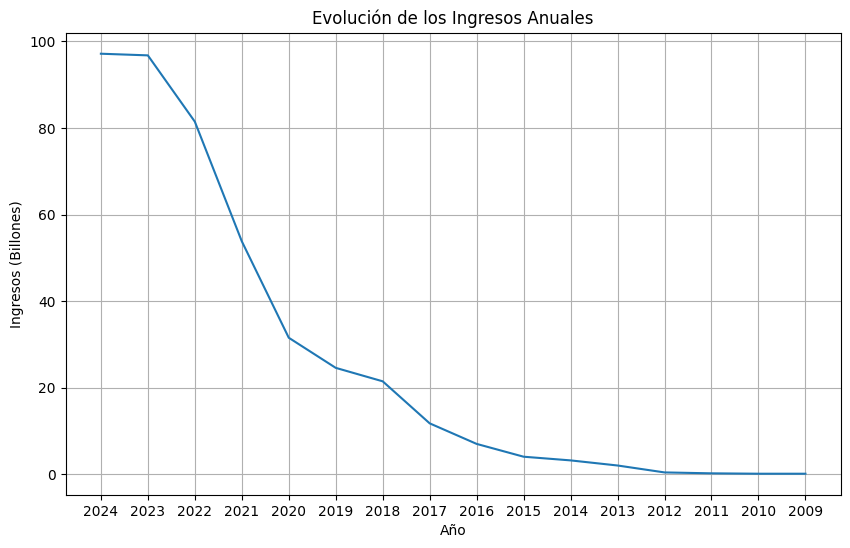

In [29]:
#Paso 6
#G´rafico de líneas
# Gráfico de Líneas
plt.figure(figsize=(10, 6))
plt.plot(dataframe['Year'], dataframe['Revenue'])
plt.title('Evolución de los Ingresos Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos (Billones)')
plt.grid(True)
plt.show()


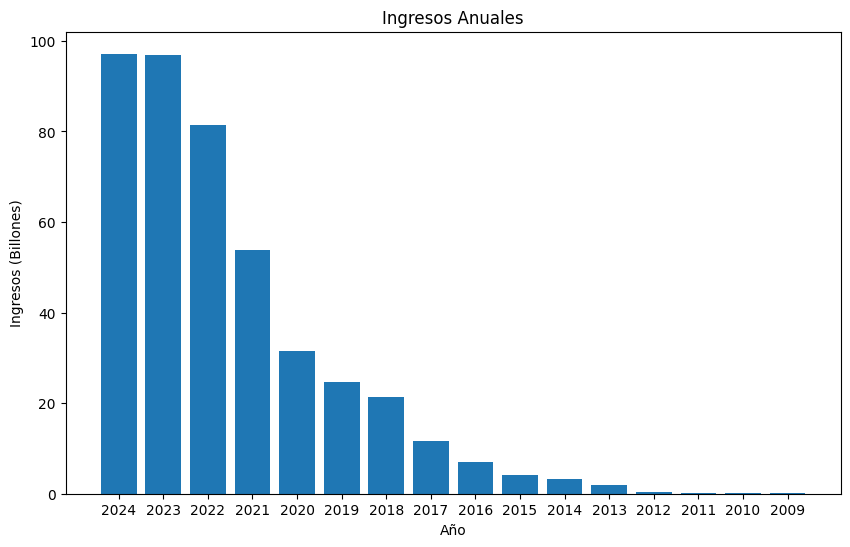

In [31]:
#grafico barras
# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(dataframe['Year'], dataframe['Revenue'])
plt.title('Ingresos Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos (Billones)')
plt.show()


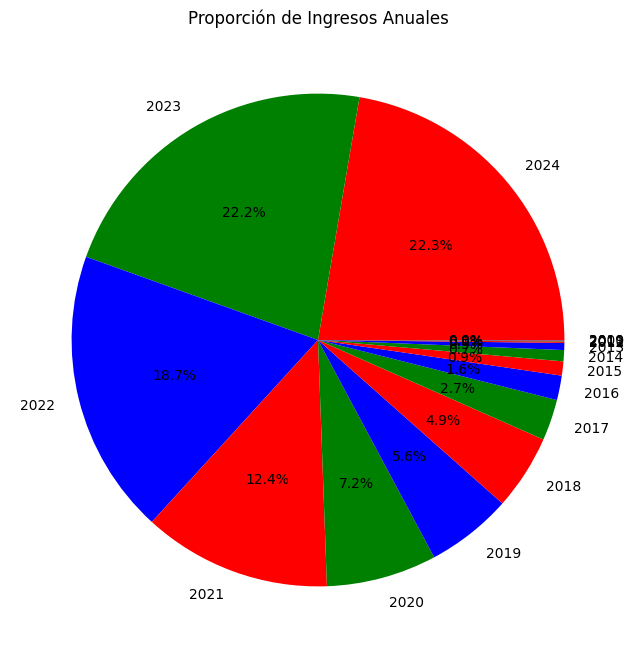

In [34]:
#gráfico de sectores
# Gráfico de Sectores
plt.figure(figsize=(8, 8))
plt.pie(dataframe['Revenue'], labels=dataframe['Year'], autopct='%1.1f%%', colors=['r', 'g', 'b'])
plt.title('Proporción de Ingresos Anuales')
plt.show()
